<a href="https://colab.research.google.com/github/naskar002/Machine-Learning-Projects/blob/main/DL_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [46]:
! kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
License(s): unknown
credit-card-customer-churn-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
import zipfile
zip_ref = zipfile.ZipFile('/content/credit-card-customer-churn-prediction.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [48]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Churn_Modelling.csv')

In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [51]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
import tensorflow

In [53]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [54]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [55]:
df.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [56]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)

In [57]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [59]:
df['Geography_Germany'] = df['Geography_Germany'].replace({True:1,False:0})
df['Geography_Spain'] = df['Geography_Spain'].replace({True:1,False:0})

In [60]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,False


In [61]:
df.Gender_Male = df.Gender_Male.replace({True:1,False:0}) #replace all the female to 0

In [62]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [63]:
X = df.drop(['Exited'],axis = 1)
y = df['Exited']

In [64]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state = 1000)

In [65]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [67]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198 (792.00 B)

 Trainable params: 198 (792.00 B)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [71]:
model_histrory = model.fit(X_train_scaled,y_train,epochs=50,batch_size=10,validation_split=0.2,verbose=1)

Epoch 1/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8717 - loss: 0.3185 - val_accuracy: 0.8550 - val_loss: 0.3501
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8663 - loss: 0.3262 - val_accuracy: 0.8581 - val_loss: 0.3483
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8729 - loss: 0.3063 - val_accuracy: 0.8581 - val_loss: 0.3483
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.3280 - val_accuracy: 0.8550 - val_loss: 0.3494
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.3133 - val_accuracy: 0.8562 - val_loss: 0.3486
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8696 - loss: 0.3157 - val_accuracy: 0.8562 - val_loss: 0.3509
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8730 - loss: 0.3122 - val_accuracy: 0.8581 - val_loss: 0.3485
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8675 - loss: 0.3275 - val_accuracy: 0.

In [72]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [73]:
y_pred

array([[0.03239395],
       [0.42066604],
       [0.76524705],
       ...,
       [0.11549533],
       [0.02170279],
       [0.05815998]], dtype=float32)

In [74]:
y_pred = y_pred.argmax(axis=-1)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.782

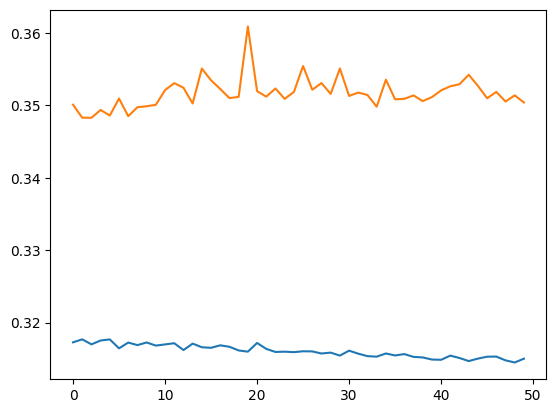

In [78]:
import matplotlib.pyplot as plt
plt.plot(model_histrory.history['loss'])
plt.plot(model_histrory.history['val_loss'])


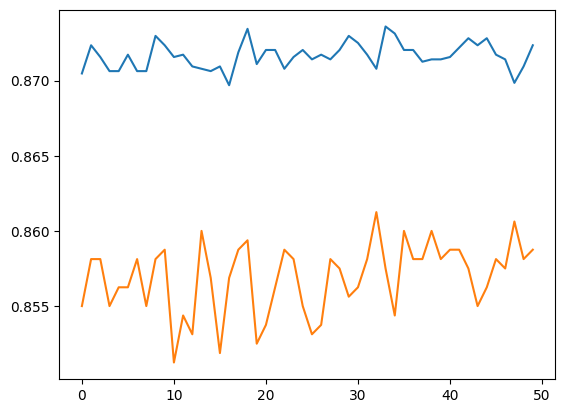

In [79]:
plt.plot(model_histrory.history['accuracy'])
plt.plot(model_histrory.history['val_accuracy'])
